<a href="https://colab.research.google.com/github/beatboxerish/fastai_projects/blob/master/Chaat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Code to access google drive 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Importing files module to upload files from our computer to Colab
from google.colab import files
# Importing libs to move around files and interact with system
import shutil
import os
# Importing modules to show images
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
# Importing lib to clear image output in cell
from IPython.display import clear_output

In [5]:
# Updating fastai library 
!curl -s https://course.fast.ai/setup/colab | bash  

Updating fastai...
Done.


In [0]:
from fastai.vision import *
np.random.seed(0)

I will be trying to make a classifier to differentiate between different Indian street food items.

The food items we will be considering are :-
1. Aloo chaat
2. Bhel Puri
3. Paani Puri
4. Bhalla Papdi
5. Aloo Tikki chaat
6. Raj Kachori
7. Fruit Chaat
8. Mattar Chaat

We will be using the following to download the images:

*urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));*

In [0]:
classes = ['aloochaat','bhelpuri','paanipuri','bhallapapdi','alootikkichaat','rajkachori','fruitchaat','mattarchaat']

In [0]:
mkdir images

In [17]:
# for making all the folders
for i in classes:
  Path('images/'+i).mkdir(parents = True,exist_ok = True)
  # The below transfers all img files to their respective folders. Make sure the name of the file is the same as the name of the class before uploading it
  print('For',i)
  files.upload()
  location_to_copy = location = 'images/' + i
  try:
    shutil.move(i, location_to_copy)
  except:
    print('File already there')

For aloochaat


Saving aloochaat to aloochaat
For bhelpuri


Saving bhelpuri to bhelpuri
For paanipuri


Saving paanipuri to paanipuri
For bhallapapdi


Saving bhallapapdi to bhallapapdi
For alootikkichaat


Saving alootikkichaat to alootikkichaat
For rajkachori


Saving rajkachori to rajkachori
For fruitchaat


Saving fruitchaat to fruitchaat
For mattarchaat


Saving mattarchaat to mattarchaat


In [18]:
# This should work properly and show all the classes
ls images

aloochaat/       bhallapapdi/  fruitchaat/   paanipuri/
alootikkichaat/  bhelpuri/     mattarchaat/  rajkachori/


In [0]:
# Download all the images from files in respective directories
for i in classes:
  dest = 'images/'+i
  print('Downloading images for:', i)
  download_images(urls = dest+'/'+i, dest =dest , max_pics = 200)
  # Deleting the images that can't be reached
  print('Verifying images for:', i)
  verify_images(path = 'images/'+i, delete = True)

If the above doesn't work or runs into an error, playing the cell again helps usually.

In [0]:
# Creating DataBunch object
data = ImageDataBunch.from_folder(path = 'images',train = '.', valid_pct = 0.3, ds_tfms = get_transforms(), size = 224, num_workers = 4).normalize(imagenet_stats)

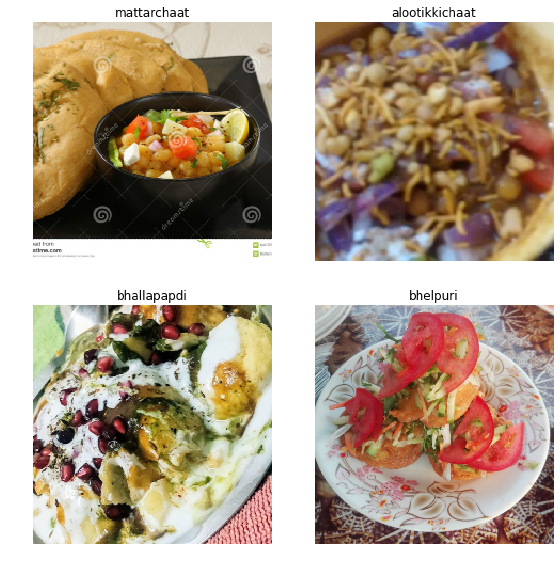

In [21]:
data.show_batch(rows = 2,ds_type=DatasetType.Valid)

In [22]:
# Building model
model = models.resnet34
learn = cnn_learner(data, model, metrics = [accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 111407002.20it/s]


In [23]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.349092,1.628971,0.398633,0.601367,01:13
1,1.856351,1.320242,0.542141,0.457859,01:12
2,1.551404,1.290155,0.569476,0.430524,01:12
3,1.343611,1.261629,0.585421,0.414579,01:13
4,1.201967,1.254648,0.589977,0.410023,01:12


As we see the accuracy is low and that could be because of various reasons. Two important reasons that we should explore before doing anything else are : 
1. Increase the number of images for each class
2. Check whether all images are labelled correctly. For this we will go through all the images and remove the ones which don't belong to that class. As widgets don't work in collab, we will have to open the images and go through them manually

In [0]:
# Here a loop is made to ensure that one can go through all the images and by pressing enter or entering 'n' to keep the image or delete it
# This should take a lot of time
for i in classes:
  path = 'images/' + i
  list_images = os.listdir(path)
  list_images.remove(i)
  for img in list_images:
    print('Supposed to be:',i)
    path2img = path + '/' + img
    img_ = mpimg.imread(path2img)
    imgplot = plt.imshow(img_)
    plt.show()
    inp = input()
    if inp == 'n':
      print('Deleting the image')
      os.remove(path2img)
    clear_output()  

In [0]:
# Creating DataBunch object
data = ImageDataBunch.from_folder(path = 'images',train = '.', valid_pct = 0.3, ds_tfms = get_transforms(), size = 224, num_workers = 4).normalize(imagenet_stats)

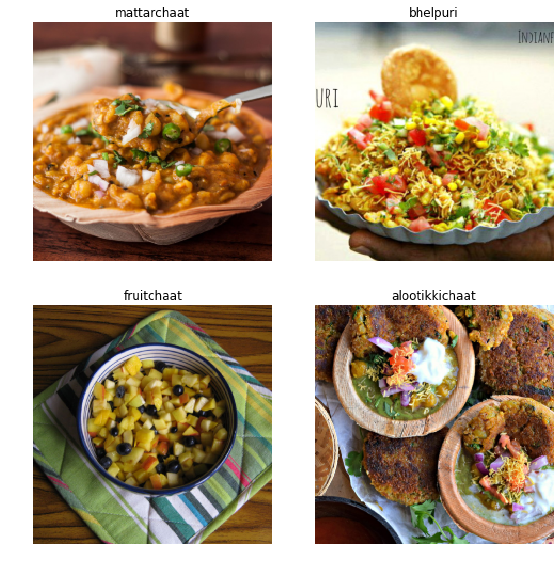

In [27]:
data.show_batch(rows= 2,ds_type = DatasetType.Valid)

In [0]:
# Uncomment and run the below to save the images folder as a zip file
!zip -r images.zip images
files.download('images.zip')

In [0]:
learn = cnn_learner(data, models.resnet34, metrics = [accuracy, error_rate])

In [33]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.637915,1.048626,0.635379,0.364621,00:45
1,0.610816,0.978177,0.642599,0.357401,00:44
2,0.572327,0.965557,0.675090,0.324910,00:46
3,0.550059,0.957856,0.678700,0.321300,00:45
4,0.512059,0.921138,0.675090,0.324910,00:45
5,0.477151,0.908271,0.678700,0.321300,00:44
6,0.447433,0.886478,0.696751,0.303249,00:45
7,0.411402,0.881599,0.696751,0.303249,00:45
8,0.384347,0.873573,0.685921,0.314079,00:45
9,0.365688,0.870340,0.689531,0.310469,00:44


We see that though we have increased the accuracy we still need it to perform much better to get any significant results. Thus we will try to optimize the model and play with different architectures.

In [34]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


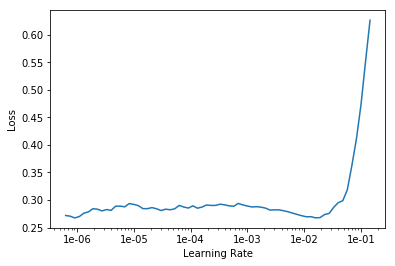

In [35]:
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(10, max_lr = slice(1e-04,1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.236057,0.862153,0.703971,0.296029,00:45
1,0.263151,0.876974,0.693141,0.306859,00:46
2,0.287924,1.049498,0.682310,0.317690,00:45
3,0.335217,1.220457,0.671480,0.328520,00:46
4,0.353751,1.064589,0.678700,0.321300,00:45
5,0.356051,1.078087,0.700361,0.299639,00:45
6,0.338687,0.918829,0.729242,0.270758,00:45
7,0.317875,0.907539,0.747292,0.252708,00:45
8,0.305275,0.889750,0.740072,0.259928,00:45
9,0.299755,0.866606,0.758123,0.241877,00:45


Wow. That really made things much better. The accuracy has come upto 75% and that's pretty good considering we were at 51% before making any changes.

Lets also try using different models to see if we can get a better score:
1. resnet50
2. resnet101
3. vgg16_bn
4. vgg19_bn

In [0]:
list_models = ['resnet50', 'resnet101', 'vgg16_bn', 'vgg19_bn']

In [38]:
for i in list_models:
  model = getattr(models, i)
  learn = cnn_learner(data, model, metrics = accuracy)
  print('For model :', i)
  learn.fit_one_cycle(5)
  print('--------------')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 112879659.44it/s]


For model : resnet50


epoch,train_loss,valid_loss,accuracy,time
0,2.075065,1.200337,0.588448,00:52
1,1.406696,1.023486,0.660650,00:47
2,1.079081,0.961637,0.693141,00:47
3,0.861900,0.949739,0.693141,00:47
4,0.741314,0.941986,0.685921,00:47


--------------


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:01<00:00, 100956742.75it/s]


For model : resnet101


epoch,train_loss,valid_loss,accuracy,time
0,1.975810,1.233982,0.555957,00:49
1,1.336269,0.984603,0.689531,00:51
2,1.012435,0.919035,0.703971,00:49
3,0.819812,0.876185,0.711191,00:49
4,0.697525,0.860637,0.714801,00:50


--------------


Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 553507836/553507836 [00:05<00:00, 100114023.44it/s]


For model : vgg16_bn


epoch,train_loss,valid_loss,accuracy,time
0,2.341239,1.824120,0.350181,01:01
1,1.804262,1.228993,0.613718,00:49
2,1.399533,0.982121,0.703971,00:49
3,1.155076,0.880060,0.678700,00:50
4,1.001967,0.846279,0.707581,00:50


--------------


Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 574769405/574769405 [00:05<00:00, 102862686.93it/s]


For model : vgg19_bn


epoch,train_loss,valid_loss,accuracy,time
0,2.354284,1.827865,0.350181,00:50
1,1.771428,1.193772,0.642599,00:48
2,1.386457,0.945733,0.703971,00:49
3,1.150595,0.855299,0.693141,00:50
4,1.018689,0.838422,0.693141,00:50


--------------


As we are getting better results with resnet101, we can choose to go with it and find its optimum learning rate

In [0]:
model = models.resnet101
learn = cnn_learner(data, model, metrics = accuracy)

In [0]:
#### first find out difference betwen for and fit_one_cycle then use this code
learn.fit(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.842807,1.433294,0.484076,00:24
1,1.353648,1.206686,0.611465,00:24
2,1.043933,1.100107,0.624204,00:26
3,0.880617,1.028029,0.630573,00:24
4,0.753780,0.964567,0.662420,00:25
5,0.656115,0.909757,0.662420,00:25
6,0.583020,0.906141,0.668790,00:24
7,0.528419,0.925889,0.681529,00:25
8,0.474888,0.944276,0.700637,00:25
9,0.429169,0.954834,0.713376,00:24


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


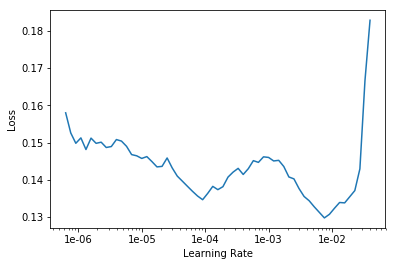

In [0]:
learn.recorder.plot()

In [0]:
learn.fit(10, slice(1e-05,1e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.153794,1.050657,0.700637,00:25
1,0.155607,1.077191,0.687898,00:26
2,0.146280,1.060156,0.687898,00:25
3,0.138019,1.100909,0.675159,00:26
4,0.138619,1.103560,0.707006,00:25
5,0.135351,1.184964,0.713376,00:26
6,0.136441,1.209341,0.694268,00:25
7,0.127200,1.252011,0.694268,00:25
8,0.125075,1.218385,0.694268,00:26
9,0.117646,1.178107,0.700637,00:26
